In [11]:
import sys,os
import numpy as np, matplotlib.pyplot as plt
import numpy
import pickle
import imp
import glob
from PIL import Image
import tifffile
from tqdm import tqdm_notebook as tqdm

import scanpy as sc
from scipy.stats import zscore
import numpy as np
import pandas as pd

save_fld = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis'

dic_count = pickle.load(open(save_fld+os.sep+'dic_count_V3_nan_patched.pkl','rb'))
dic_cells_final = pickle.load(open(save_fld+os.sep+'dic_cells_final_V3.pkl','rb'))
cells = list(dic_count.keys())
#genes = np.unique([Q for cell in cells for Q in dic_count[cell].keys()])
#genes = #['Q'+str(i+1) for i in range(48)]#+['G14','G15','G18','G21']
allQs = np.unique([q for cell in dic_count for q in dic_count[cell].keys()])
genes = allQs
#genes = [q for q in allQs if 'B' not in q and 'I' not in q]
dic_annot = {'Gfap': 'Q1', 'Q1': 'Gfap', 'Cspg4': 'Q2', 'Q2': 'Cspg4', 'Olig1': 'Q3', 'Q3': 'Olig1', 'Cx3cr1': 'Q4', 'Q4': 'Cx3cr1', 'Gja1': 'Q5', 'Q5': 'Gja1', 'Pdgfra': 'Q6', 'Q6': 'Pdgfra', 'Flt1': 'Q7', 'Q7': 'Flt1', 'Gad1': 'Q8', 'Q8': 'Gad1', 'Tmem212': 'Q9', 'Q9': 'Tmem212', 'Aqp4': 'Q10', 'Q10': 'Aqp4', 'Cadps2': 'Q11', 'Q11': 'Cadps2', 'P2ry12': 'Q12', 'Q12': 'P2ry12', 'Rbfox3': 'Q13', 'Q13': 'Rbfox3', 'Dcc': 'Q14', 'Q14': 'Dcc', 'Mog': 'Q15', 'Q15': 'Mog', 'Slc17a7': 'Q16', 'Q16': 'Slc17a7', 'Il1rapl2': 'Q17', 'Q17': 'Il1rapl2', 'Mobp': 'Q18', 'Q18': 'Mobp', 'Col25a1': 'Q19', 'Q19': 'Col25a1', 'Lrrtm4': 'Q20', 'Q20': 'Lrrtm4', 'Fos': 'Q21', 'Q21': 'Fos', 'Dab1': 'Q22', 'Q22': 'Dab1', 'Mgat4c': 'Q23', 'Q23': 'Mgat4c', 'Cntnap5b': 'Q24', 'Q24': 'Cntnap5b', 'Hs3st4': 'Q25', 'Q25': 'Hs3st4', 'Pde10a': 'Q26', 'Q26': 'Pde10a', 'Ldb2': 'Q27', 'Q27': 'Ldb2', 'Hs6st3': 'Q28', 'Q28': 'Hs6st3', 'Sdk1': 'Q29', 'Q29': 'Sdk1', 'Sema6d': 'Q30', 'Q30': 'Sema6d', 'Kirrel3': 'Q31', 'Q31': 'Kirrel3', 'Sgcz': 'Q32', 'Q32': 'Sgcz', 'Tafa2': 'Q33', 'Q33': 'Tafa2', 'Scg2': 'Q34', 'Q34': 'Scg2', 'Bdnf': 'Q35', 'Q35': 'Bdnf', 'Tenm2': 'Q36', 'Q36': 'Tenm2', 'Q103': 'Cox6a1', 'Q104': 'Ecel1', 'Q105': 'Cbln2', 'Q100': 'Gria1', 'Cox6a1': 'Q103', 'Ecel1': 'Q104', 'Cbln2': 'Q105', 'Gria1': 'Q100'}
genes_names=[dic_annot.get(gn) for gn in genes]#['Adarb2', 'Apod', 'Atp1a2', 'C1ql3', 'Cacnb2', 'Cald1', 'Camk2d', 'Camk2n1', 'Cdh18', 'Cnr1', 'Cst3', 'Cttnbp2', 'Dab1', 'Dcc', 'Dcn', 'Flt1', 'Fras1', 'Gad2', 'Hs3st2', 'Hs3st4', 'Il1rapl2', 'Kcnc2', 'Kcnq5', 'Mef2c', 'Meis2', 'Mt1', 'Ndnf', 'Ndst4', 'Nnat', 'Nos1', 'Nr4a2', 'Nrep', 'Ntng1', 'Ppfia2', 'Ptprd', 'Qk', 'Rbms3', 'Sgcd', 'Slc6a1', 'Sst', 'Tafa1', 'Tafa2', 'Trps1', 'Tshz2', 'Wfs1', 'Wipf3', 'Zbtb20', 'Zfpm2']

dic_Q_to_gene = {gn:gn_nm for gn,gn_nm in zip(genes,genes_names)}
dic_gene_to_Q = {gn_nm:gn for gn,gn_nm in zip(genes,genes_names)}

cells = list(dic_count.keys())
data = np.array([[dic_count[cell][gene]for gene in genes]for cell in cells])
genes_f = [dic_annot.get(gn,gn)for gn in genes]
count_table2 = pd.DataFrame(data=data, index=cells, columns=genes_f)
cells = list(dic_count.keys())
data = [list(dic_cells_final[cell]['X'][1:])+[dic_cells_final[cell]['volume']] for cell in dic_cells_final]
celldata2 = pd.DataFrame(data=data, index=cells, columns=['global_x','global_y','volume'])


scdata2 = sc.AnnData(count_table2)
scdata2.obsm["X_spatial"] = np.array(
    celldata2[["global_x", "global_y"]].reindex(
        index=scdata2.obs.index.astype(int)
    )
)
scdata2.obsm["volume"] = np.array(
    celldata2["volume"].reindex(
        index=scdata2.obs.index.astype(int)
    )
)

C:\Users\bbintu\anaconda3\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


array([[3475.18258 , 2044.7314  ],
       [3481.46572 , 2059.03096 ],
       [3482.54902 , 2030.75683 ],
       ...,
       [2485.66576 , 2727.75359 ],
       [2602.77049 , 2571.75839 ],
       [2616.907555, 2573.92499 ]])

In [15]:
filename = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RRNA_scanpy.h5ad'
scdata2.write_h5ad(filename)

In [16]:
sc.pp.filter_cells(scdata2, min_genes=5)
scdata2.obsm["X_raw"] = scdata2.X.copy()
sc.pp.calculate_qc_metrics(scdata2, percent_top=None, inplace=True)
sc.pp.normalize_total(scdata2, target_sum=np.median(scdata2.obs["total_counts"]))


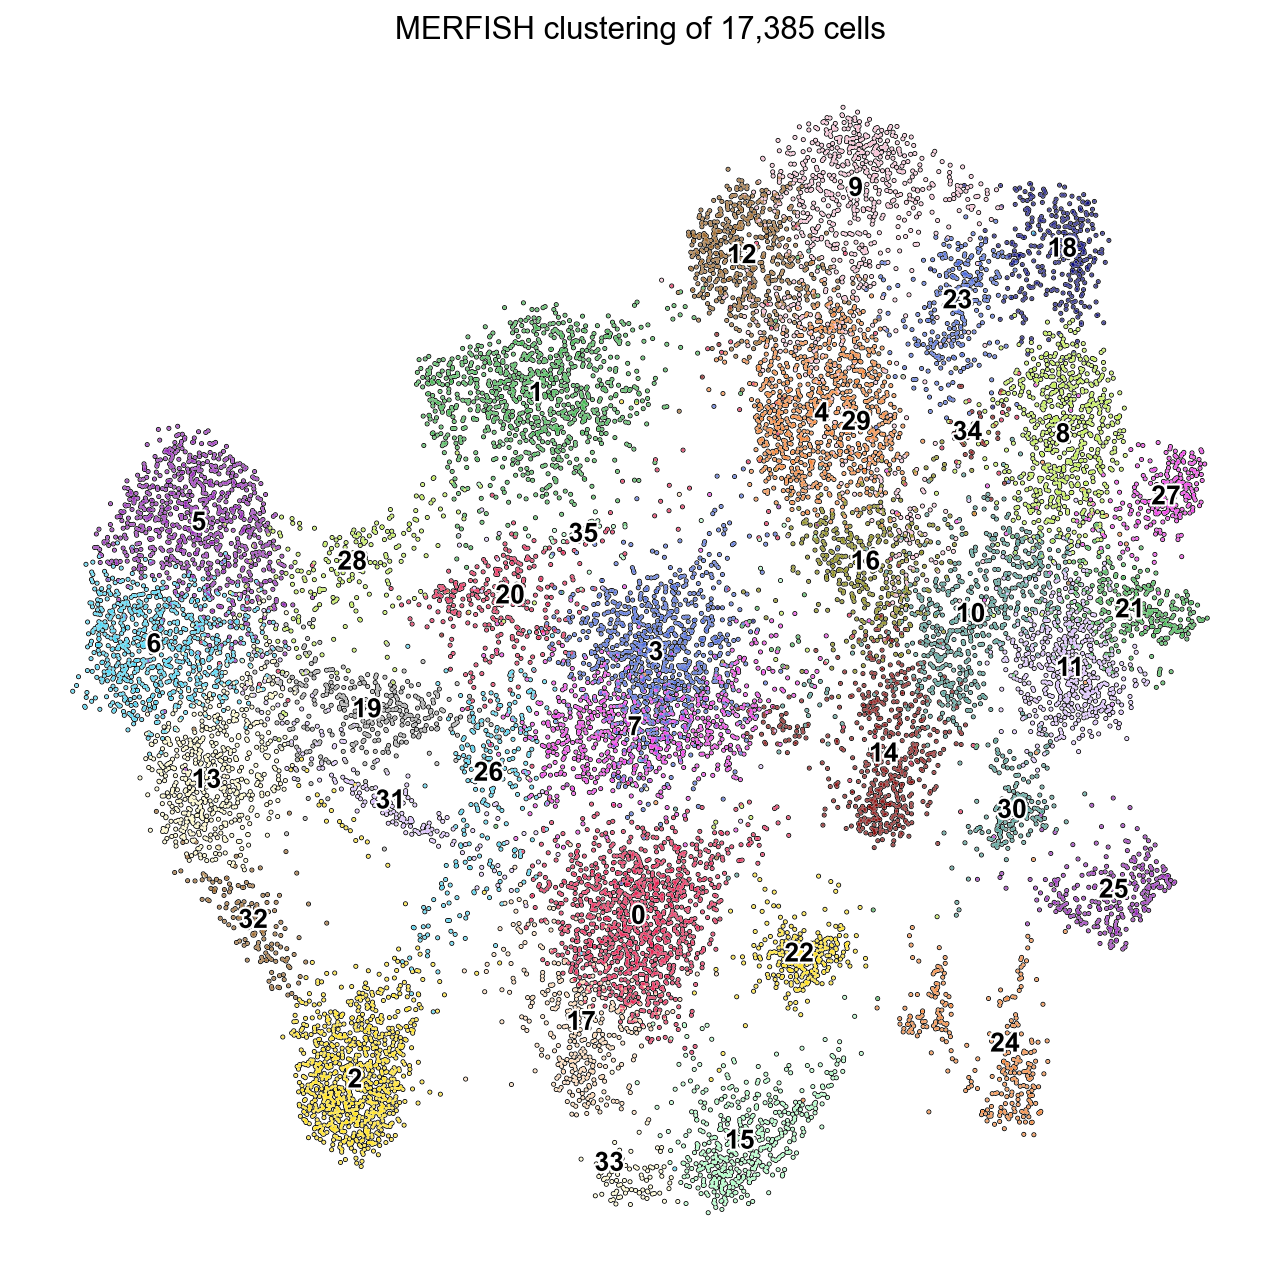

In [17]:
sc.pp.log1p(scdata2)

#scdata2.X = scdata2.to_df().apply(zscore, axis=0).to_numpy()

### Should we use PCA?

### Should we do z-scores. Explore this with spatial maps. Visual inspection.

sc.pp.neighbors(scdata2,use_rep = "X")  #metric='correlation', use_rep = "X"
sc.tl.leiden(scdata2, resolution=3) #### 
#plt.figure()
sc.tl.umap(scdata2,random_state=9)
cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

sc.set_figure_params(figsize=(10,10))
sc.pl.umap(
    scdata2,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    frameon=False,
    title=f"MERFISH clustering of {len(scdata2):,d} cells",
    palette=cmap
)